In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/abalone.csv")
df

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...,...
4172,4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## 결측치 확인

In [4]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

## 이상치 확인

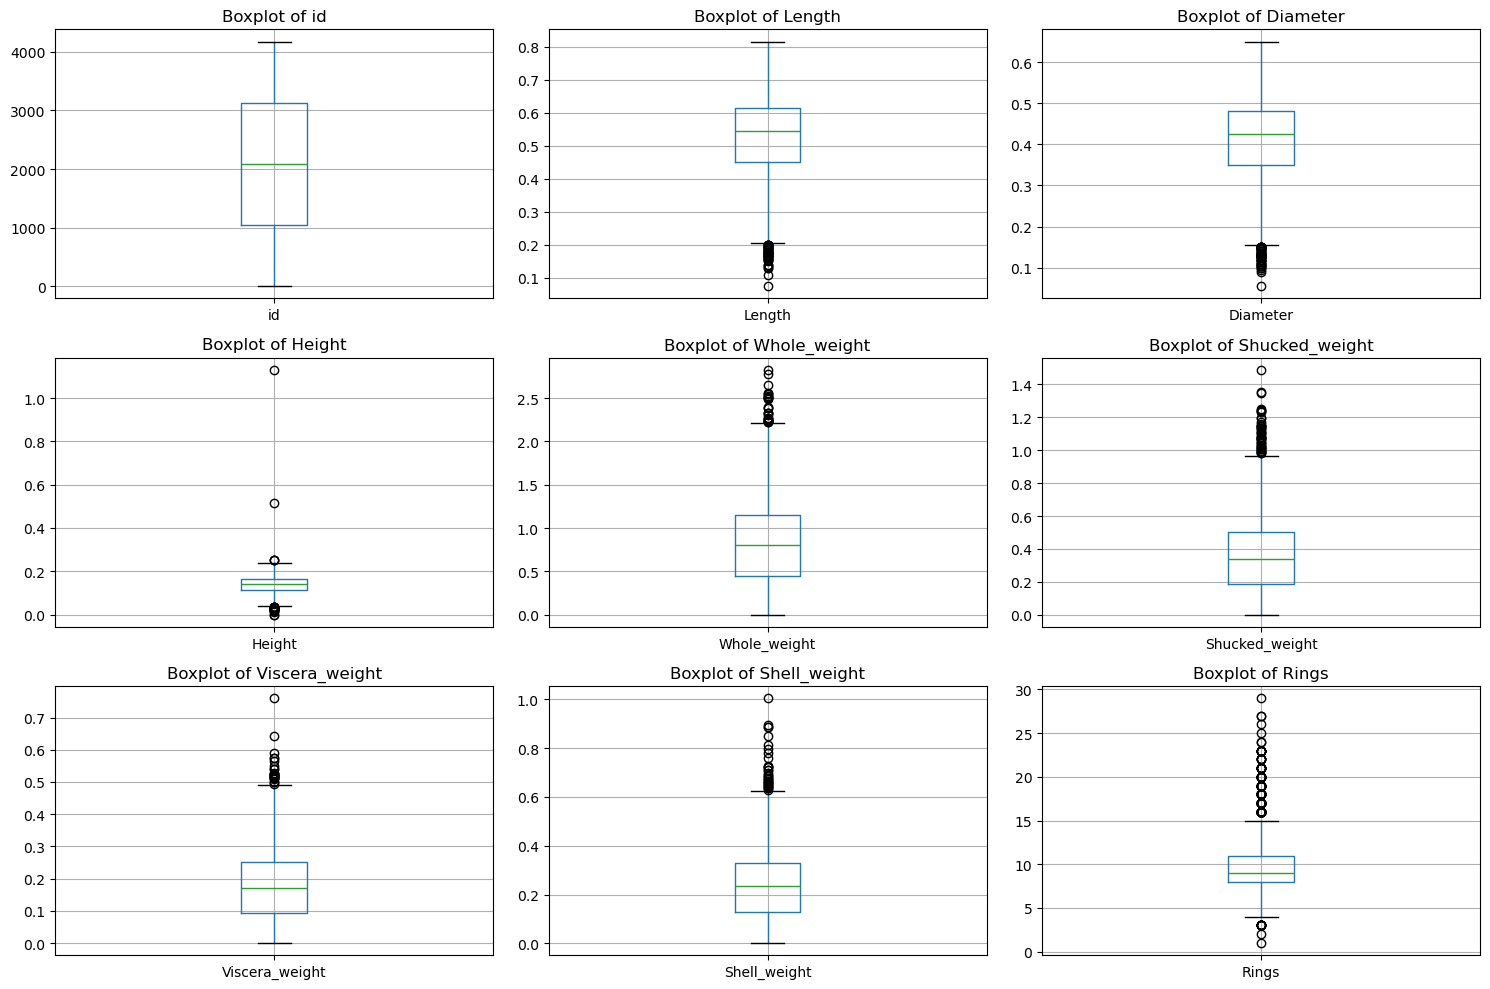

In [5]:
# 수치형 데이터 열만 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯을 그리기 위한 설정
plt.figure(figsize=(15, 10))

# 각 변수에 대해 개별 박스플롯을 그립니다.
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # 3x3 grid로 subplot을 설정
    df.boxplot(column)
    plt.title(f'Boxplot of {column}')

# 레이아웃을 자동으로 조정하여 겹치지 않게 함
plt.tight_layout()

# 플롯을 출력
plt.show()

### 컬럼 설명

1. **Sex**: 전복의 성별 (M: 수컷, F: 암컷, I: 새끼)
2. **Length**: 전복의 최대 길이 (밀리미터 단위)
3. **Diameter**: 전복의 지름, 길이에 수직인 측정치 (밀리미터 단위)
4. **Height**: 전복의 높이, 껍질 속 고기 포함 (밀리미터 단위)
5. **Whole weight**: 전복 전체의 무게 (그램 단위)
6. **Shucked weight**: 전복 고기의 무게 (그램 단위)
7. **Viscera weight**: 전복의 내장 무게, 출혈 후 측정 (그램 단위)
8. **Shell weight**: 건조 후 전복 껍질의 무게 (그램 단위)
9. **Rings**: 전복의 고리 수, 나이 추정의 기준 (+1.5년)

In [6]:
df.info

<bound method DataFrame.info of         id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0        0   M   0.455     0.365   0.095        0.5140          0.2245   
1        1   M   0.350     0.265   0.090        0.2255          0.0995   
2        2   F   0.530     0.420   0.135        0.6770          0.2565   
3        3   M   0.440     0.365   0.125        0.5160          0.2155   
4        4   I   0.330     0.255   0.080        0.2050          0.0895   
...    ...  ..     ...       ...     ...           ...             ...   
4172  4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173  4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174  4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175  4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176  4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera_weight  Shell_weight  Rings  
0             0.1010        0.1500 

In [7]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

### 인코딩 (문자->수치)

In [8]:
# 'Sex'컬럼의 F/M을 수치화
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])

/var/folders/9x/8whwzmnj6z5bjc7_h1txd9_r0000gn/T/ipykernel_56677/2749004283.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rings', data=df, palette='Set3')


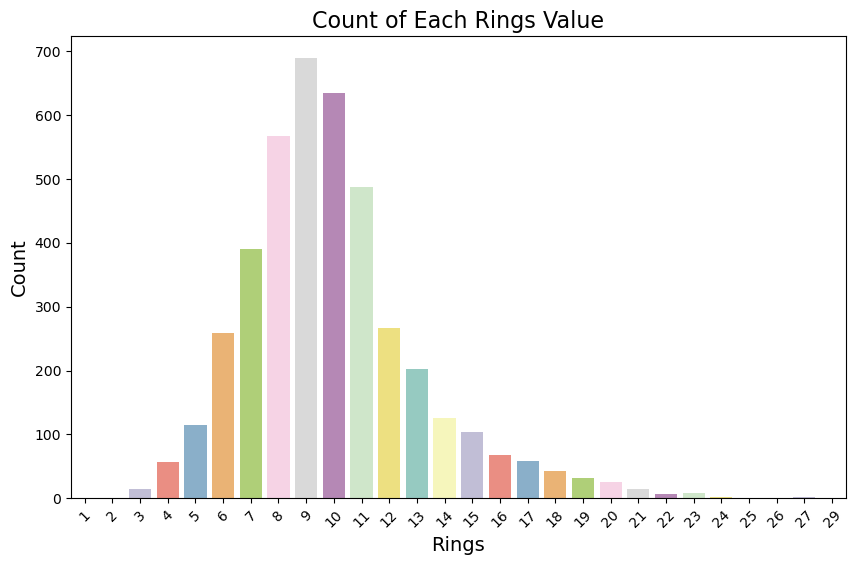

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# 카운트플롯 그리기
plt.figure(figsize=(10, 6))
sns.countplot(x='Rings', data=df, palette='Set3')
plt.title('Count of Each Rings Value', fontsize=16)
plt.xlabel('Rings', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # x축 값이 겹치지 않도록 회전
plt.show()

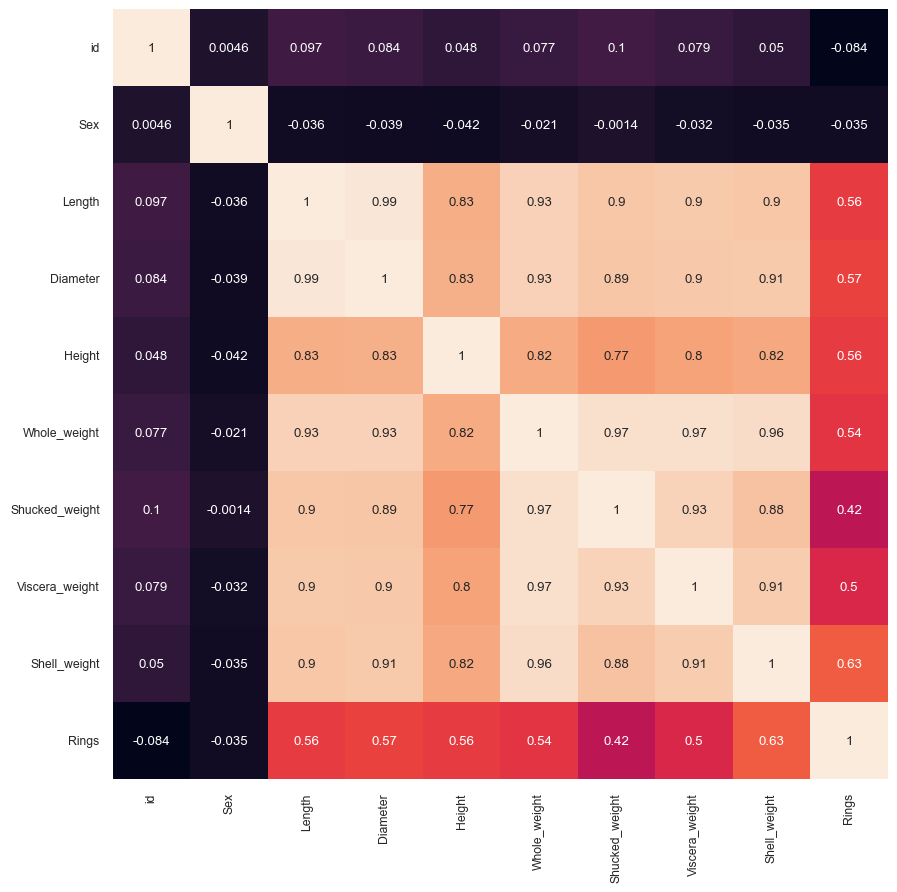

In [10]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [11]:
y = df["Rings"]
y 

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [12]:
y.value_counts

<bound method IndexOpsMixin.value_counts of 0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64>

In [13]:
x = df.drop("Rings" , axis = 1)
x

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...,...
4172,4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [14]:
print(x.shape)
print(y.shape)

(4177, 9)
(4177,)


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Length'}>],
       [<Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole_weight'}>],
       [<Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>,
        <Axes: title={'center': 'Shell_weight'}>],
       [<Axes: title={'center': 'Rings'}>, <Axes: >, <Axes: >]],
      dtype=object)

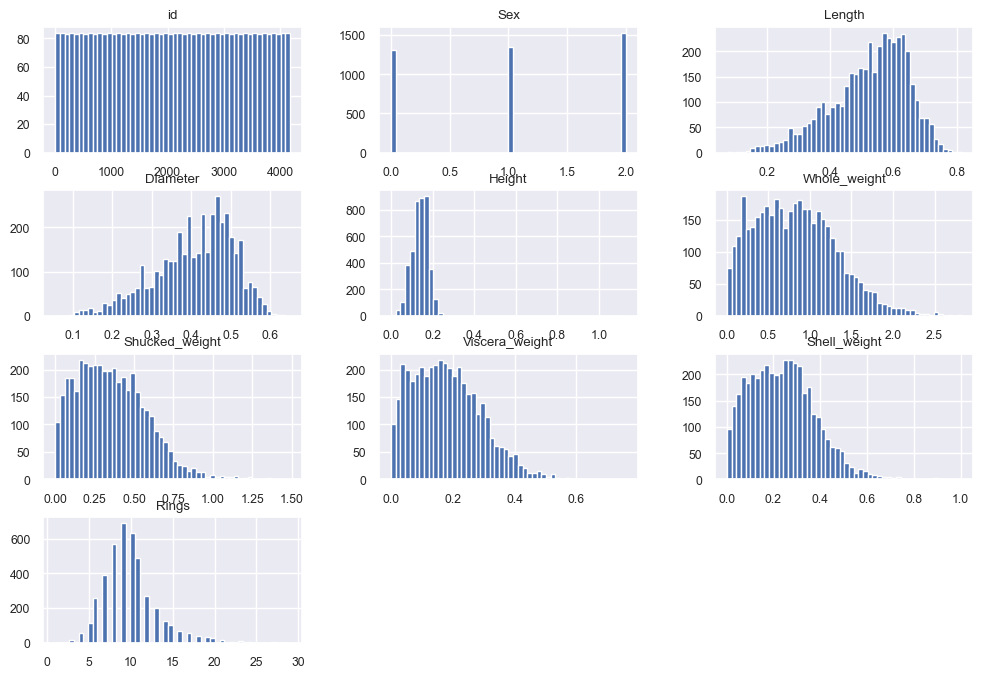

In [15]:
df.hist(bins=50, figsize=(12, 8))

In [16]:
# split_sequence 함수
def split_sequence(df, n_steps):
    X, y = [], []
    for i in range(len(df) - n_steps):
        seq_x = df.iloc[i:i+n_steps, :-1].values  # 마지막 열(Rings)을 제외한 특징들
        seq_y = df.iloc[i+n_steps, -1]  # Rings (예측할 값)
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [17]:
n_steps = 7

X, y = split_sequence(df, n_steps)
print("입력 데이터 (X):", X)
print("출력 데이터 (y):", y)

입력 데이터 (X): [[[0.000e+00 2.000e+00 4.550e-01 ... 2.245e-01 1.010e-01 1.500e-01]
  [1.000e+00 2.000e+00 3.500e-01 ... 9.950e-02 4.850e-02 7.000e-02]
  [2.000e+00 0.000e+00 5.300e-01 ... 2.565e-01 1.415e-01 2.100e-01]
  ...
  [4.000e+00 1.000e+00 3.300e-01 ... 8.950e-02 3.950e-02 5.500e-02]
  [5.000e+00 1.000e+00 4.250e-01 ... 1.410e-01 7.750e-02 1.200e-01]
  [6.000e+00 0.000e+00 5.300e-01 ... 2.370e-01 1.415e-01 3.300e-01]]

 [[1.000e+00 2.000e+00 3.500e-01 ... 9.950e-02 4.850e-02 7.000e-02]
  [2.000e+00 0.000e+00 5.300e-01 ... 2.565e-01 1.415e-01 2.100e-01]
  [3.000e+00 2.000e+00 4.400e-01 ... 2.155e-01 1.140e-01 1.550e-01]
  ...
  [5.000e+00 1.000e+00 4.250e-01 ... 1.410e-01 7.750e-02 1.200e-01]
  [6.000e+00 0.000e+00 5.300e-01 ... 2.370e-01 1.415e-01 3.300e-01]
  [7.000e+00 0.000e+00 5.450e-01 ... 2.940e-01 1.495e-01 2.600e-01]]

 [[2.000e+00 0.000e+00 5.300e-01 ... 2.565e-01 1.415e-01 2.100e-01]
  [3.000e+00 2.000e+00 4.400e-01 ... 2.155e-01 1.140e-01 1.550e-01]
  [4.000e+00 1.000e+

In [18]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((2668, 7, 9), (834, 7, 9), (2668,), (834,), (668, 7, 9), (668,))

In [19]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D, Bidirectional, ConvLSTM1D
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))  # 출력 레이어, 회귀이므로 'linear' 사용
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])  # 회귀에서는 MSE 사용
model.summary()

Metal device set to: Apple M2 Pro


2024-09-30 18:11:14.952124: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-30 18:11:14.952312: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 16)             448       
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 32)             1568      
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 32)             3104      
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 5,665
Trainable params: 5,665
Non-trainabl

In [21]:
batch_size = 16

train_epochs = 100
history = model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=True, shuffle=True)

Epoch 1/100


2024-09-30 18:11:15.435852: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-09-30 18:11:15.727483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - ETA: 0s - loss: 76.5841 - mean_squared_error: 76.5841

2024-09-30 18:11:20.635102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


167/167 [==============================] - 5s 11ms/step - loss: 76.5841 - mean_squared_error: 76.5841 - val_loss: 36.2253 - val_mean_squared_error: 36.2253
Epoch 2/100
167/167 [==============================] - 1s 6ms/step - loss: 60.2349 - mean_squared_error: 60.2349 - val_loss: 104.4052 - val_mean_squared_error: 104.4052
Epoch 3/100
167/167 [==============================] - 1s 6ms/step - loss: 48.6390 - mean_squared_error: 48.6390 - val_loss: 54.9982 - val_mean_squared_error: 54.9982
Epoch 4/100
167/167 [==============================] - 1s 6ms/step - loss: 38.4269 - mean_squared_error: 38.4269 - val_loss: 27.5470 - val_mean_squared_error: 27.5470
Epoch 5/100
167/167 [==============================] - 1s 6ms/step - loss: 31.2965 - mean_squared_error: 31.2965 - val_loss: 26.7828 - val_mean_squared_error: 26.7828
Epoch 6/100
167/167 [==============================] - 1s 6ms/step - loss: 27.3267 - mean_squared_error: 27.3267 - val_loss: 27.9213 - val_mean_squared_error: 27.9213
Epoch 7

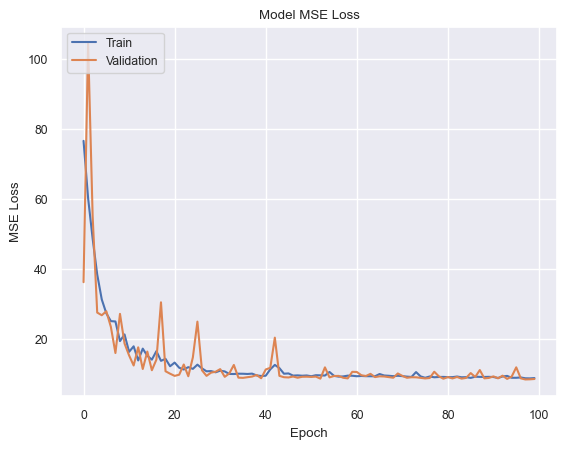

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE Loss')  # 'model loss'를 'Model MSE Loss'로 변경
plt.ylabel('MSE Loss')  # y축 레이블을 'MSE Loss'로 변경
plt.xlabel('Epoch')  # x축 레이블은 'Epoch' 그대로 유지
plt.legend(['Train', 'Validation'], loc='upper left')  # 범례 그대로 유지
plt.show()

17/27 [=================>............] - ETA: 0s

2024-09-30 18:13:26.812647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 1s 28ms/step
MSE: 7.611179230521093
MAE: 2.0771706218628
R^2 Score: 0.23449931932571622


Text(0, 0.5, 'Predicted Values')

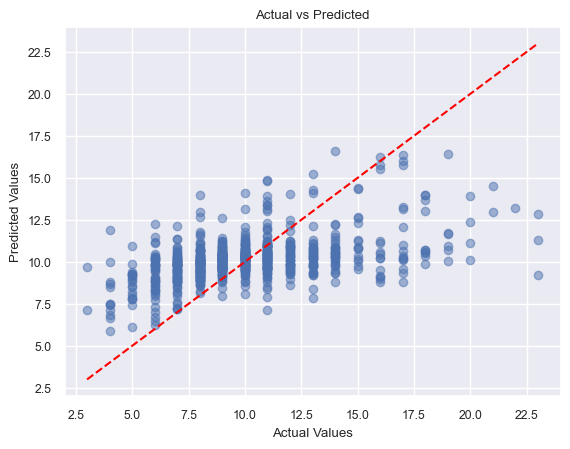

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predy = model.predict(X_test)

mse = mean_squared_error(y_test, predy)
mae = mean_absolute_error(y_test, predy)
r2 = r2_score(y_test, predy)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')

plt.scatter(y_test, predy, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')